# Author: Damaris A. 

## Supporting Question: Influence of Dissolved Oxygen on Water Quality

In [1]:
import zipfile
import pandas as pd
import numpy as np

zip_file_path = "narrowresult.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)


print(df.head())

/tmp/ipykernel_597/1006302658.py:13: DtypeWarning: Columns (10,13,15,19,20,22,31,33,34,36,38,40,43,48,60,64,65,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


  OrganizationIdentifier                             OrganizationFormalName  \
0              CALWR_WQX           California Department Of Water Resources   
1                  CEDEN     California State Water Resources Control Board   
2                21CABCH  Southern California Coastal Water Research Pro...   
3                  CEDEN     California State Water Resources Control Board   
4                  CEDEN     California State Water Resources Control Board   

                      ActivityIdentifier ActivityStartDate  \
0                  CALWR_WQX-BL13B658987        2013-05-07   
1                      CEDEN--2146157048        2013-04-29   
2  21CABCH-ENCINAL BEACH SOUTH-4/29/2013        2013-04-29   
3                      CEDEN--2146149071        2013-05-20   
4                      CEDEN--2145498327        2013-05-22   

  ActivityStartTime/Time ActivityStartTime/TimeZoneCode  \
0               10:45:00                            PST   
1               13:00:00          

In [2]:
# Define the most relevant characteristics for predicting DO levels
relevant_characteristics = [
    'Dissolved oxygen (DO)', 'Temperature, water', 'pH', 'Specific conductance',
    'Turbidity', 'Nitrate', 'Ammonia', 'Chlorophyll a', 'Flow'
]

# Filter the data based on the most relevant characteristics
filtered_data = df[df['CharacteristicName'].isin(relevant_characteristics)]

# Print the first few rows of the filtered data
print(filtered_data.head())

   OrganizationIdentifier                          OrganizationFormalName  \
13           11NPSWRD_WQX  National Park Service Water Resources Division   
14              CALWR_WQX        California Department Of Water Resources   
29           11NPSWRD_WQX  National Park Service Water Resources Division   
53           11NPSWRD_WQX  National Park Service Water Resources Division   
61              CALWR_WQX        California Department Of Water Resources   

                         ActivityIdentifier ActivityStartDate  \
13  11NPSWRD_WQX-PRSF_WQ_LOB5_20131022_F^01        2013-10-22   
14                    CALWR_WQX-DA0113B0002        2013-01-15   
29  11NPSWRD_WQX-SFAN_I&M_GG1_20130408_F^01        2013-04-08   
53   11NPSWRD_WQX-PRSF_WQ_DF1_20130924_F^01        2013-09-24   
61                    CALWR_WQX-BL13B656485        2013-04-02   

   ActivityStartTime/Time ActivityStartTime/TimeZoneCode  \
13               12:45:00                            PDT   
14               14:55:00 

In [3]:
#check missing data 
# Check for missing values
missing_data = filtered_data.isnull().sum()
missing_data

OrganizationIdentifier                      0
OrganizationFormalName                      0
ActivityIdentifier                          0
ActivityStartDate                           0
ActivityStartTime/Time                   1488
                                        ...  
LaboratoryAccreditationAuthorityName    72965
TaxonomistAccreditationIndicator        72965
TaxonomistAccreditationAuthorityName    72965
LabSamplePreparationUrl                 72965
ProviderName                                0
Length: 78, dtype: int64

# Data Cleaning #

In [4]:
# Check for missing values
missing_data = filtered_data.isnull().sum()

# Display columns with missing values
print(missing_data[missing_data > 0])

ActivityStartTime/Time                   1488
ActivityStartTime/TimeZoneCode           1488
DataLoggerLine                          72965
ResultDetectionConditionText            69823
MethodSpecificationName                 60980
                                        ...  
LaboratoryAccreditationIndicator        67892
LaboratoryAccreditationAuthorityName    72965
TaxonomistAccreditationIndicator        72965
TaxonomistAccreditationAuthorityName    72965
LabSamplePreparationUrl                 72965
Length: 68, dtype: int64


In [5]:
# Check the data types of the columns
print(filtered_data.dtypes)

# Convert 'ActivityStartDate' to datetime if necessary
filtered_data.loc[:, 'ActivityStartDate'] = pd.to_datetime(filtered_data['ActivityStartDate'], errors='coerce')

OrganizationIdentifier                   object
OrganizationFormalName                   object
ActivityIdentifier                       object
ActivityStartDate                        object
ActivityStartTime/Time                   object
                                         ...   
LaboratoryAccreditationAuthorityName    float64
TaxonomistAccreditationIndicator        float64
TaxonomistAccreditationAuthorityName    float64
LabSamplePreparationUrl                 float64
ProviderName                             object
Length: 78, dtype: object


In [6]:
# Set a threshold for how many missing values are acceptable (e.g., 50% of the data)
threshold = 0.5
cols_to_drop = missing_data[missing_data / len(filtered_data) > threshold].index

# Drop columns with too many missing values
filtered_data = filtered_data.drop(columns=cols_to_drop)

print(f"Dropped columns with too many missing values: {cols_to_drop.tolist()}")

Dropped columns with too many missing values: ['DataLoggerLine', 'ResultDetectionConditionText', 'MethodSpecificationName', 'ResultSampleFractionText', 'MeasureQualifierCode', 'StatisticalBaseCode', 'ResultWeightBasisText', 'ResultTimeBasisText', 'ResultTemperatureBasisText', 'ResultParticleSizeBasisText', 'PrecisionValue', 'DataQuality/BiasValue', 'ConfidenceIntervalValue', 'UpperConfidenceLimitValue', 'LowerConfidenceLimitValue', 'ResultCommentText', 'USGSPCode', 'ResultDepthHeightMeasure/MeasureValue', 'ResultDepthHeightMeasure/MeasureUnitCode', 'ResultDepthAltitudeReferencePointText', 'ResultSamplingPointName', 'BiologicalIntentName', 'BiologicalIndividualIdentifier', 'SubjectTaxonomicName', 'UnidentifiedSpeciesIdentifier', 'SampleTissueAnatomyName', 'GroupSummaryCountWeight/MeasureValue', 'GroupSummaryCountWeight/MeasureUnitCode', 'CellFormName', 'CellShapeName', 'HabitName', 'VoltismName', 'TaxonomicPollutionTolerance', 'TaxonomicPollutionToleranceScaleText', 'TrophicLevelName', 

In [7]:
# Fill missing values for numerical columns with the mean (or median if you prefer)
numerical_cols = filtered_data.select_dtypes(include=[np.number]).columns

# Fill with the mean for numerical columns
filtered_data[numerical_cols] = filtered_data[numerical_cols].fillna(filtered_data[numerical_cols].mean())

print("Filled missing values in numerical columns with the mean.")

Filled missing values in numerical columns with the mean.


In [8]:
# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = filtered_data.select_dtypes(include=['object']).columns

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    filtered_data[col] = filtered_data[col].fillna(filtered_data[col].mode()[0])

print("Filled missing values in categorical columns with the mode.")

/tmp/ipykernel_597/672950071.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data[col] = filtered_data[col].fillna(filtered_data[col].mode()[0])


Filled missing values in categorical columns with the mode.


In [9]:
# Convert columns that should be categorical (based on inspection)
cols_to_convert = ['OrganizationIdentifier', 'ActivityIdentifier', 'ProviderName']  # Add more if needed

for col in cols_to_convert:
    filtered_data[col] = filtered_data[col].astype('category')

print("Converted specified columns to categorical type.")

Converted specified columns to categorical type.


In [10]:
# Fill missing values for numerical columns with the mean (or median if you prefer)
numerical_cols = filtered_data.select_dtypes(include=[np.number]).columns

# Fill missing values with the mean for numerical columns
filtered_data[numerical_cols] = filtered_data[numerical_cols].fillna(filtered_data[numerical_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = filtered_data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    filtered_data[col] = filtered_data[col].fillna(filtered_data[col].mode()[0])

print("Filled missing values in numerical and categorical columns.")

Filled missing values in numerical and categorical columns.


In [11]:
# Check the shape of the data to ensure the correct number of rows and columns
print(filtered_data.shape)

# Inspect the first few rows to confirm the remaining columns
print(filtered_data.head())

# Check for any remaining missing values
print(filtered_data.isnull().sum())

(72965, 17)
   OrganizationIdentifier                          OrganizationFormalName  \
13           11NPSWRD_WQX  National Park Service Water Resources Division   
14              CALWR_WQX        California Department Of Water Resources   
29           11NPSWRD_WQX  National Park Service Water Resources Division   
53           11NPSWRD_WQX  National Park Service Water Resources Division   
61              CALWR_WQX        California Department Of Water Resources   

                         ActivityIdentifier ActivityStartDate  \
13  11NPSWRD_WQX-PRSF_WQ_LOB5_20131022_F^01        2013-10-22   
14                    CALWR_WQX-DA0113B0002        2013-01-15   
29  11NPSWRD_WQX-SFAN_I&M_GG1_20130408_F^01        2013-04-08   
53   11NPSWRD_WQX-PRSF_WQ_DF1_20130924_F^01        2013-09-24   
61                    CALWR_WQX-BL13B656485        2013-04-02   

   ActivityStartTime/Time ActivityStartTime/TimeZoneCode  \
13               12:45:00                            PDT   
14            

In [12]:
# Check for duplicate rows
duplicates = filtered_data.duplicated().sum()

if duplicates > 0:
    print(f"Number of duplicate rows: {duplicates}")
    # Drop duplicates if any
    filtered_data = filtered_data.drop_duplicates()
    print("Dropped duplicate rows.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [13]:
# Detect outliers using IQR method for numerical columns
Q1 = filtered_data[numerical_cols].quantile(0.25)
Q3 = filtered_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((filtered_data[numerical_cols] < (Q1 - 1.5 * IQR)) | (filtered_data[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()

print(f"Number of outliers per column:\n{outliers_count}")

Number of outliers per column:
Series([], dtype: float64)


In [14]:
# Check the cleaned dataset
print(filtered_data.head())

# Verify if any missing values remain
print(filtered_data.isnull().sum())

   OrganizationIdentifier                          OrganizationFormalName  \
13           11NPSWRD_WQX  National Park Service Water Resources Division   
14              CALWR_WQX        California Department Of Water Resources   
29           11NPSWRD_WQX  National Park Service Water Resources Division   
53           11NPSWRD_WQX  National Park Service Water Resources Division   
61              CALWR_WQX        California Department Of Water Resources   

                         ActivityIdentifier ActivityStartDate  \
13  11NPSWRD_WQX-PRSF_WQ_LOB5_20131022_F^01        2013-10-22   
14                    CALWR_WQX-DA0113B0002        2013-01-15   
29  11NPSWRD_WQX-SFAN_I&M_GG1_20130408_F^01        2013-04-08   
53   11NPSWRD_WQX-PRSF_WQ_DF1_20130924_F^01        2013-09-24   
61                    CALWR_WQX-BL13B656485        2013-04-02   

   ActivityStartTime/Time ActivityStartTime/TimeZoneCode  \
13               12:45:00                            PDT   
14               14:55:00 

In [15]:
# Extract year, month, day from 'ActivityStartDate'
filtered_data['Year'] = filtered_data['ActivityStartDate'].dt.year
filtered_data['Month'] = filtered_data['ActivityStartDate'].dt.month
filtered_data['Day'] = filtered_data['ActivityStartDate'].dt.day

# You can also extract time-based features from 'ActivityStartTime/Time' if needed
filtered_data['Hour'] = pd.to_datetime(filtered_data['ActivityStartTime/Time'], format='%H:%M:%S').dt.hour
filtered_data

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,CharacteristicName,ResultMeasureValue,...,ResultStatusIdentifier,ResultValueTypeName,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,ResultAnalyticalMethod/MethodName,ProviderName,Year,Month,Day,Hour
13,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-PRSF_WQ_LOB5_20131022_F^01,2013-10-22,12:45:00,PDT,11NPSWRD_WQX-PRSF_WQ_LOB5,STORET-974385318,Specific conductance,590.2,...,Final,Actual,SFAN_YSI_PROPLUS,11NPSWRD_WQX,YSI Professional Plus (Pro Plus) Multiparamete...,STORET,2013,10,22,12
14,CALWR_WQX,California Department Of Water Resources,CALWR_WQX-DA0113B0002,2013-01-15,14:55:00,PST,CALWR_WQX-KA000000,STORET-476775098,Specific conductance,570,...,Accepted,Actual,120.1,USEPA,Conductance,STORET,2013,1,15,14
29,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-SFAN_I&M_GG1_20130408_F^01,2013-04-08,12:30:00,PDT,11NPSWRD_WQX-SFAN_I&M_GG1,STORET-974332184,pH,7.68,...,Final,Actual,SFAN_YSI_PROPLUS,11NPSWRD_WQX,YSI Professional Plus (Pro Plus) Multiparamete...,STORET,2013,4,8,12
53,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-PRSF_WQ_DF1_20130924_F^01,2013-09-24,09:50:00,PDT,11NPSWRD_WQX-PRSF_WQ_DF1,STORET-974375195,Specific conductance,500.3,...,Final,Actual,SFAN_YSI_PROPLUS,11NPSWRD_WQX,YSI Professional Plus (Pro Plus) Multiparamete...,STORET,2013,9,24,9
61,CALWR_WQX,California Department Of Water Resources,CALWR_WQX-BL13B656485,2013-04-02,11:45:00,PST,CALWR_WQX-B9C75861385,STORET-476356332,Turbidity,0,...,Accepted,Actual,180.1,USEPA,Turbidity by Nephelometry,STORET,2013,4,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676158,USGS-CA,USGS California Water Science Center,nwisca.01.02400242,2023-11-01,10:00:00,PST,USGS-374027122130401,NWIS-126635316,Chlorophyll a,2.5,...,Preliminary,Actual,00050,USGS,"Plant pigments, sonication & 445",NWIS,2023,11,1,10
676160,USGS-CA,USGS California Water Science Center,nwisca.01.02400242,2023-11-01,10:00:00,PST,USGS-374027122130401,NWIS-126635318,Nitrate,1.12,...,Preliminary,Actual,ALGOR,USGS,Computation by NWIS algorithm,NWIS,2023,11,1,10
676170,USGS-CA,USGS California Water Science Center,nwisca.01.02400110,2023-10-17,08:23:00,PST,USGS-373920122155201,NWIS-126552632,Nitrate,0.247,...,Preliminary,Actual,ALGOR,USGS,Computation by NWIS algorithm,NWIS,2023,10,17,8
676180,USGS-CA,USGS California Water Science Center,nwisca.01.02400110,2023-10-17,08:23:00,PST,USGS-373920122155201,NWIS-126552643,Chlorophyll a,4.6,...,Preliminary,Actual,FL016,USGS,"Pigments, algae, EPA445.0 w/ACTN",NWIS,2023,10,17,8


In [16]:
df.isnull().sum()

OrganizationIdentifier                       0
OrganizationFormalName                       0
ActivityIdentifier                           0
ActivityStartDate                            0
ActivityStartTime/Time                   69268
                                         ...  
LaboratoryAccreditationAuthorityName    676186
TaxonomistAccreditationIndicator        676186
TaxonomistAccreditationAuthorityName    676186
LabSamplePreparationUrl                 676186
ProviderName                                 0
Length: 78, dtype: int64

In [17]:
df[df['ActivityStartTime/Time'].isnull()].head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
2,21CABCH,Southern California Coastal Water Research Pro...,21CABCH-ENCINAL BEACH SOUTH-4/29/2013,2013-04-29,NaN,NaN,21CABCH-ENCINAL BEACH SOUTH,STORET-283378496,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
8,21CABCH,Southern California Coastal Water Research Pro...,21CABCH-Crown Bird Sanctuary-10/3/2013,2013-10-03,NaN,NaN,21CABCH-Crown Bird Sanctuary,STORET-284568238,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
10,21CABCH,Southern California Coastal Water Research Pro...,21CABCH-Pillar Point #8-7/8/2013,2013-07-08,NaN,NaN,21CABCH-Pillar Point #8,STORET-283543813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
11,21CABCH,Southern California Coastal Water Research Pro...,21CABCH-Crown Windsurfer Corner-4/29/2013,2013-04-29,NaN,NaN,21CABCH-Crown Windsurfer Corner,STORET-283376995,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
17,21CABCH,Southern California Coastal Water Research Pro...,21CABCH-OCEAN#17_SL-8/19/2013,2013-08-19,NaN,NaN,21CABCH-OCEAN#17_SL,STORET-283661728,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


In [18]:
# Fill missing values in the 'ActivityStartTime/Time' column
df['ActivityStartTime/Time'] = df['ActivityStartTime/Time'].ffill()

# Fill missing values in the 'ActivityStartTime/TimeZoneCode' column
df['ActivityStartTime/TimeZoneCode'] = df['ActivityStartTime/TimeZoneCode'].fillna('Unknown')

In [19]:
# For filling categorical or other columns with the most frequent value (mode)
df['ProviderName'] = df['ProviderName'].fillna(df['ProviderName'].mode()[0])

In [20]:
df.columns[df.columns.str.contains('LaboratoryAccreditation', case=False)]

Index(['LaboratoryAccreditationIndicator', 'LaboratoryAccreditationAuthorityName'], dtype='object')

In [21]:
# impute missing values 
df['LaboratoryAccreditationIndicator'] = df['LaboratoryAccreditationIndicator'].fillna('Unknown')
df['ResultLaboratoryCommentText'] = df['ResultLaboratoryCommentText'].fillna('Unknown')
df['ResultDetectionQuantitationLimitUrl'] = df['ResultDetectionQuantitationLimitUrl'].fillna('Unknown')
df['TaxonomistAccreditationAuthorityName'] = df['TaxonomistAccreditationAuthorityName'].fillna('Unknown')
df.isnull().sum()

OrganizationIdentifier                       0
OrganizationFormalName                       0
ActivityIdentifier                           0
ActivityStartDate                            0
ActivityStartTime/Time                       0
                                         ...  
LaboratoryAccreditationAuthorityName    676186
TaxonomistAccreditationIndicator        676186
TaxonomistAccreditationAuthorityName         0
LabSamplePreparationUrl                 676186
ProviderName                                 0
Length: 78, dtype: int64

In [22]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [23]:
# Example: Creating a new feature 'year' from 'ActivityStartDate' (if it's a datetime column)
df['ActivityStartDate'] = pd.to_datetime(df['ActivityStartDate'], errors='coerce')
df['year'] = df['ActivityStartDate'].dt.year

In [24]:
# Drop columns with excessive missing values (e.g., >50% missing)
df_cleaned = df.loc[:, df.isnull().mean() < 0.5]

# Verify the remaining missing values
print(df_cleaned.isnull().sum())

OrganizationIdentifier                                 0
OrganizationFormalName                                 0
ActivityIdentifier                                     0
ActivityStartDate                                      0
ActivityStartTime/Time                                 0
ActivityStartTime/TimeZoneCode                         0
MonitoringLocationIdentifier                           0
ResultIdentifier                                       0
CharacteristicName                                     0
ResultMeasureValue                                111626
ResultMeasure/MeasureUnitCode                     168697
ResultStatusIdentifier                                 0
ResultValueTypeName                                    0
ResultAnalyticalMethod/MethodIdentifier           228455
ResultAnalyticalMethod/MethodIdentifierContext    228455
ResultAnalyticalMethod/MethodName                 228506
ResultLaboratoryCommentText                            0
ResultDetectionQuantitationLimi

In [25]:
# Impute missing categorical columns with 'Unknown'
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna('Unknown')

# Impute missing numerical columns with the median
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

# Verify the remaining missing values
print(df_cleaned.isnull().sum())

/tmp/ipykernel_597/2124444311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna('Unknown')
/tmp/ipykernel_597/2124444311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())


OrganizationIdentifier                            0
OrganizationFormalName                            0
ActivityIdentifier                                0
ActivityStartDate                                 0
ActivityStartTime/Time                            0
ActivityStartTime/TimeZoneCode                    0
MonitoringLocationIdentifier                      0
ResultIdentifier                                  0
CharacteristicName                                0
ResultMeasureValue                                0
ResultMeasure/MeasureUnitCode                     0
ResultStatusIdentifier                            0
ResultValueTypeName                               0
ResultAnalyticalMethod/MethodIdentifier           0
ResultAnalyticalMethod/MethodIdentifierContext    0
ResultAnalyticalMethod/MethodName                 0
ResultLaboratoryCommentText                       0
ResultDetectionQuantitationLimitUrl               0
LaboratoryAccreditationIndicator                  0
TaxonomistAc

In [26]:
# Check the shape and data types after cleaning
print(df_cleaned.shape)
print(df_cleaned.dtypes)

(676186, 22)
OrganizationIdentifier                                    object
OrganizationFormalName                                    object
ActivityIdentifier                                        object
ActivityStartDate                                 datetime64[ns]
ActivityStartTime/Time                                    object
ActivityStartTime/TimeZoneCode                            object
MonitoringLocationIdentifier                              object
ResultIdentifier                                          object
CharacteristicName                                        object
ResultMeasureValue                                        object
ResultMeasure/MeasureUnitCode                             object
ResultStatusIdentifier                                    object
ResultValueTypeName                                       object
ResultAnalyticalMethod/MethodIdentifier                   object
ResultAnalyticalMethod/MethodIdentifierContext            object
ResultAnalyt

In [27]:
df.isnull().sum()

OrganizationIdentifier                       0
OrganizationFormalName                       0
ActivityIdentifier                           0
ActivityStartDate                            0
ActivityStartTime/Time                       0
                                         ...  
TaxonomistAccreditationIndicator        676186
TaxonomistAccreditationAuthorityName         0
LabSamplePreparationUrl                 676186
ProviderName                                 0
year                                         0
Length: 79, dtype: int64

In [28]:
# Fill missing values for categorical columns with 'Unknown'
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned.loc[:, categorical_columns] = df_cleaned[categorical_columns].fillna('Unknown')

# Fill missing values for numerical columns with median (for ResultMeasureValue, etc.)
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned.loc[:, numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

# Check if missing values have been handled
df_cleaned.isnull().sum()

OrganizationIdentifier                            0
OrganizationFormalName                            0
ActivityIdentifier                                0
ActivityStartDate                                 0
ActivityStartTime/Time                            0
ActivityStartTime/TimeZoneCode                    0
MonitoringLocationIdentifier                      0
ResultIdentifier                                  0
CharacteristicName                                0
ResultMeasureValue                                0
ResultMeasure/MeasureUnitCode                     0
ResultStatusIdentifier                            0
ResultValueTypeName                               0
ResultAnalyticalMethod/MethodIdentifier           0
ResultAnalyticalMethod/MethodIdentifierContext    0
ResultAnalyticalMethod/MethodName                 0
ResultLaboratoryCommentText                       0
ResultDetectionQuantitationLimitUrl               0
LaboratoryAccreditationIndicator                  0
TaxonomistAc

In [29]:
df_cleaned = df_cleaned.drop_duplicates()

In [30]:
# Numeric columns ResultMeasureValue change to be in a numerical type float64
df_cleaned['ResultMeasureValue'] = pd.to_numeric(df_cleaned['ResultMeasureValue'], errors='coerce')

In [31]:
#Outliers detecting 
Q1 = df_cleaned['ResultMeasureValue'].quantile(0.25)
Q3 = df_cleaned['ResultMeasureValue'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[(df_cleaned['ResultMeasureValue'] >= (Q1 - 1.5 * IQR)) & 
                        (df_cleaned['ResultMeasureValue'] <= (Q3 + 1.5 * IQR))]

In [32]:
#feature engineering 
df_cleaned['Year'] = df_cleaned['ActivityStartDate'].dt.year
df_cleaned['Month'] = df_cleaned['ActivityStartDate'].dt.month
df_cleaned['Day'] = df_cleaned['ActivityStartDate'].dt.day
df_cleaned['Weekday'] = df_cleaned['ActivityStartDate'].dt.weekday
df_cleaned['Hour'] = df_cleaned['ActivityStartDate'].dt.hour

In [33]:
#remove irrelevant columns
df_cleaned = df_cleaned.drop(columns=['ActivityStartTime/TimeZoneCode', 'ResultLaboratoryCommentText'])

In [34]:
# Define the most relevant characteristics for predicting DO levels
relevant_characteristics = [
    'Dissolved oxygen (DO)', 'Temperature, water', 'pH', 'Specific conductance',
    'Turbidity', 'Nitrate', 'Ammonia', 'Chlorophyll a', 'Flow'
]

# Filter the data based on the most relevant characteristics
filtered_data = df_cleaned[df_cleaned['CharacteristicName'].isin(relevant_characteristics)]

# Print the first few rows of the filtered data
filtered_data.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,MonitoringLocationIdentifier,ResultIdentifier,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,...,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,TaxonomistAccreditationAuthorityName,ProviderName,year,Year,Month,Day,Weekday,Hour
29,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-SFAN_I&M_GG1_20130408_F^01,2013-04-08,12:30:00,11NPSWRD_WQX-SFAN_I&M_GG1,STORET-974332184,pH,7.68,Unknown,...,Unknown,Unknown,Unknown,STORET,2013,2013,4,8,0,0
61,CALWR_WQX,California Department Of Water Resources,CALWR_WQX-BL13B656485,2013-04-02,11:45:00,CALWR_WQX-B9C75861385,STORET-476356332,Turbidity,0.00,NTU,...,https://www.waterqualitydata.us/data/providers...,Unknown,Unknown,STORET,2013,2013,4,2,1,0
72,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-PRSF_WQ_EL1_20130717_F^02,2013-07-17,11:50:00,11NPSWRD_WQX-PRSF_WQ_EL1,STORET-974378107,Turbidity,8.77,NTU,...,https://www.waterqualitydata.us/data/providers...,Unknown,Unknown,STORET,2013,2013,7,17,2,0
81,CALWR_WQX,California Department Of Water Resources,CALWR_WQX-CFF0413B0116,2013-04-18,10:45:00,CALWR_WQX-B9D75861372,STORET-476701319,pH,9.36,Unknown,...,Unknown,Unknown,Unknown,STORET,2013,2013,4,18,3,0
83,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-PORE_WQ_PAC1B_20130219_F^01,2013-02-19,09:50:00,11NPSWRD_WQX-PORE_WQ_PAC1B,STORET-974483117,pH,6.76,Unknown,...,Unknown,Unknown,Unknown,STORET,2013,2013,2,19,1,0


In [35]:
# Display the first few rows of the filtered dataset to ensure it contains the right data
print(filtered_data[['CharacteristicName', 'ResultMeasureValue']].head())

# Check for unique characteristic names to ensure the relevant ones are in the dataset
print(filtered_data['CharacteristicName'].unique())

   CharacteristicName  ResultMeasureValue
29                 pH                7.68
61          Turbidity                0.00
72          Turbidity                8.77
81                 pH                9.36
83                 pH                6.76
['pH' 'Turbidity' 'Dissolved oxygen (DO)' 'Temperature, water' 'Ammonia'
 'Chlorophyll a' 'Nitrate' 'Flow' 'Specific conductance']


In [36]:
# Convert 'ResultMeasureValue' to numeric, coercing errors to NaN
filtered_data['ResultMeasureValue'] = pd.to_numeric(filtered_data['ResultMeasureValue'], errors='coerce')

# Pivot data to get each characteristic as a separate column
pivot_data = filtered_data.pivot_table(
    index=['MonitoringLocationIdentifier', 'ActivityStartDate', 'Month', 'Year',],
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

# Check for missing values
print(pivot_data.isnull().sum())
pivot_data.head()

CharacteristicName
MonitoringLocationIdentifier        0
ActivityStartDate                   0
Month                               0
Year                                0
Ammonia                         11485
Chlorophyll a                   11835
Dissolved oxygen (DO)            8204
Flow                            13264
Nitrate                          7541
Specific conductance            13366
Temperature, water               4077
Turbidity                        8059
pH                               5167
dtype: int64


/tmp/ipykernel_597/676873980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ResultMeasureValue'] = pd.to_numeric(filtered_data['ResultMeasureValue'], errors='coerce')


CharacteristicName,MonitoringLocationIdentifier,ActivityStartDate,Month,Year,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH
0,11NPSWRD_WQX-PORE_319_EU-L,2012-01-23,1,2012,NaN,NaN,10.730,17.8106,0.20,95.40,10.8,40.6,7.00
1,11NPSWRD_WQX-PORE_319_EU-L,2012-03-13,3,2012,NaN,NaN,9.265,0.2295,0.22,108.25,10.1,NaN,6.63
2,11NPSWRD_WQX-PORE_319_EU-L,2012-03-27,3,2012,NaN,NaN,10.740,1.7280,NaN,107.20,9.8,15.7,7.03
3,11NPSWRD_WQX-PORE_319_EU-L,2012-04-12,4,2012,NaN,NaN,10.700,1.7172,NaN,106.50,10.5,12.3,7.18
4,11NPSWRD_WQX-PORE_319_EU-L,2012-11-28,11,2012,NaN,NaN,8.370,NaN,0.55,NaN,12.8,12.4,6.99


In [37]:
# # Convert 'ResultMeasureValue' to numeric, handling errors by coercing invalid values to NaN
# filtered_data.loc[:, 'ResultMeasureValue'] = pd.to_numeric(filtered_data['ResultMeasureValue'], errors='coerce')

# # Drop rows with NaN values in 'ResultMeasureValue'
# filtered_data_cleaned = filtered_data.dropna(subset=['ResultMeasureValue'])

# # Check the number of missing values again
# print(filtered_data_cleaned.isnull().sum())

# EDA

In [38]:
pivot_data.head()

CharacteristicName,MonitoringLocationIdentifier,ActivityStartDate,Month,Year,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH
0,11NPSWRD_WQX-PORE_319_EU-L,2012-01-23,1,2012,NaN,NaN,10.730,17.8106,0.20,95.40,10.8,40.6,7.00
1,11NPSWRD_WQX-PORE_319_EU-L,2012-03-13,3,2012,NaN,NaN,9.265,0.2295,0.22,108.25,10.1,NaN,6.63
2,11NPSWRD_WQX-PORE_319_EU-L,2012-03-27,3,2012,NaN,NaN,10.740,1.7280,NaN,107.20,9.8,15.7,7.03
3,11NPSWRD_WQX-PORE_319_EU-L,2012-04-12,4,2012,NaN,NaN,10.700,1.7172,NaN,106.50,10.5,12.3,7.18
4,11NPSWRD_WQX-PORE_319_EU-L,2012-11-28,11,2012,NaN,NaN,8.370,NaN,0.55,NaN,12.8,12.4,6.99


In [39]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13577 entries, 0 to 13576
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MonitoringLocationIdentifier  13577 non-null  object        
 1   ActivityStartDate             13577 non-null  datetime64[ns]
 2   Month                         13577 non-null  int32         
 3   Year                          13577 non-null  int32         
 4   Ammonia                       2092 non-null   float64       
 5   Chlorophyll a                 1742 non-null   float64       
 6   Dissolved oxygen (DO)         5373 non-null   float64       
 7   Flow                          313 non-null    float64       
 8   Nitrate                       6036 non-null   float64       
 9   Specific conductance          211 non-null    float64       
 10  Temperature, water            9500 non-null   float64       
 11  Turbidity                   

In [40]:
pivot_data.describe()

CharacteristicName,ActivityStartDate,Month,Year,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH
count,13577,13577.000000,13577.000000,2092.000000,1742.000000,5373.000000,313.000000,6036.000000,211.000000,9500.000000,5518.000000,8410.000000
mean,2015-07-23 05:20:37.475141632,6.130294,2015.093172,0.225572,8.714344,8.423823,5.115390,1.649115,93.778057,14.450922,9.438026,7.693300
min,2010-01-04 00:00:00,1.000000,2010.000000,-0.500000,-54.401200,0.060000,0.000459,-0.170000,0.800000,0.300000,0.000000,2.500000
25%,2012-05-16 00:00:00,3.000000,2012.000000,0.036000,0.038000,7.080000,0.522000,0.220000,84.550000,11.400000,1.160000,7.400000
50%,2015-01-21 00:00:00,6.000000,2015.000000,0.100000,3.200000,8.860000,2.150000,0.644250,99.600000,13.827500,3.380000,7.690000
75%,2018-02-21 00:00:00,9.000000,2018.000000,0.225000,8.000000,10.090000,3.029000,1.700000,107.650000,16.800000,10.000000,8.000000
max,2023-12-12 00:00:00,12.000000,2023.000000,14.538016,114.000000,105.800000,88.000000,44.000000,114.400000,71.260000,114.000000,16.600000
std,NaN,3.345840,3.723968,0.522846,16.806705,3.251518,11.165790,3.155853,19.644438,4.278682,15.940132,0.509176


In [41]:
pivot_data.columns

Index(['MonitoringLocationIdentifier', 'ActivityStartDate', 'Month', 'Year',
       'Ammonia', 'Chlorophyll a', 'Dissolved oxygen (DO)', 'Flow', 'Nitrate',
       'Specific conductance', 'Temperature, water', 'Turbidity', 'pH'],
      dtype='object', name='CharacteristicName')

In [42]:
pivot_data.loc[:, 'ActivityStartDate'] = pd.to_datetime(pivot_data['ActivityStartDate'])
pivot_data = pivot_data.copy()
pivot_data['ActivityStartDate'] = pd.to_datetime(pivot_data['ActivityStartDate'])

In [43]:
# Overview of the data
print("Dataset Shape:", pivot_data.shape)
print("\nSummary Statistics:")
print(pivot_data.describe())

# Checking missing values
print("\nMissing Values (%):")
print(pivot_data.isnull().mean() * 100)

# Unique values for categorical columns
categorical_columns = pivot_data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}: {pivot_data[col].nunique()} unique values")

Dataset Shape: (13577, 13)

Summary Statistics:
CharacteristicName              ActivityStartDate         Month          Year  \
count                                       13577  13577.000000  13577.000000   
mean                2015-07-23 05:20:37.475141632      6.130294   2015.093172   
min                           2010-01-04 00:00:00      1.000000   2010.000000   
25%                           2012-05-16 00:00:00      3.000000   2012.000000   
50%                           2015-01-21 00:00:00      6.000000   2015.000000   
75%                           2018-02-21 00:00:00      9.000000   2018.000000   
max                           2023-12-12 00:00:00     12.000000   2023.000000   
std                                           NaN      3.345840      3.723968   

CharacteristicName      Ammonia  Chlorophyll a  Dissolved oxygen (DO)  \
count               2092.000000    1742.000000            5373.000000   
mean                   0.225572       8.714344               8.423823   
min

In [44]:
# # Distribution of records over time
# pivot_data['Year'] = pivot_data['ActivityStartDate'].dt.year
# pivot_data['Month'] = pivot_data['ActivityStartDate'].dt.month

# # Records per year
# print("\nRecords per Year:")
# print(pivot_data['Year'].value_counts())

# # Plotting trend of Dissolved Oxygen (DO) over time
# import matplotlib.pyplot as plt

# pivot_data.groupby('Year')['ResultMeasureValue'].mean().plot(kind='line')
# plt.title('Average Dissolved Oxygen (DO) Over Time')
# plt.xlabel('Year')
# plt.ylabel('DO Value')
# plt.show()

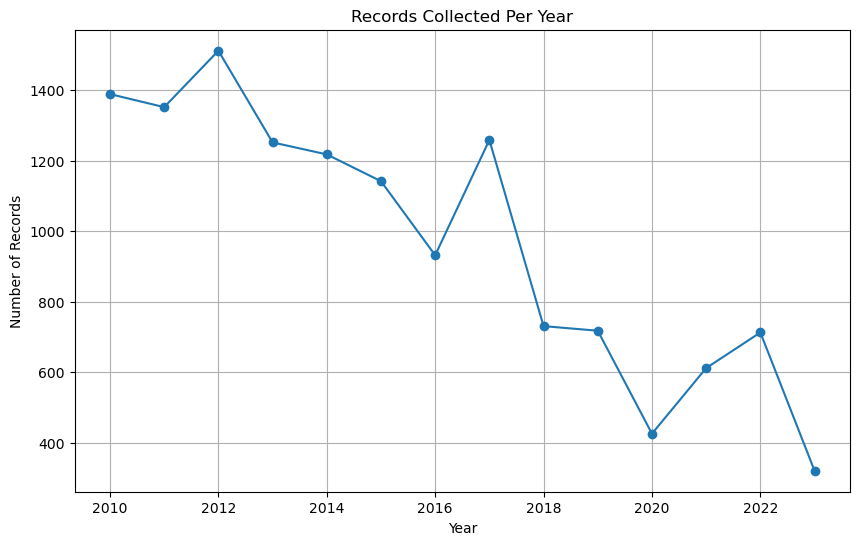

In [45]:
import matplotlib.pyplot as plt

yearly_counts = pivot_data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Records Collected Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

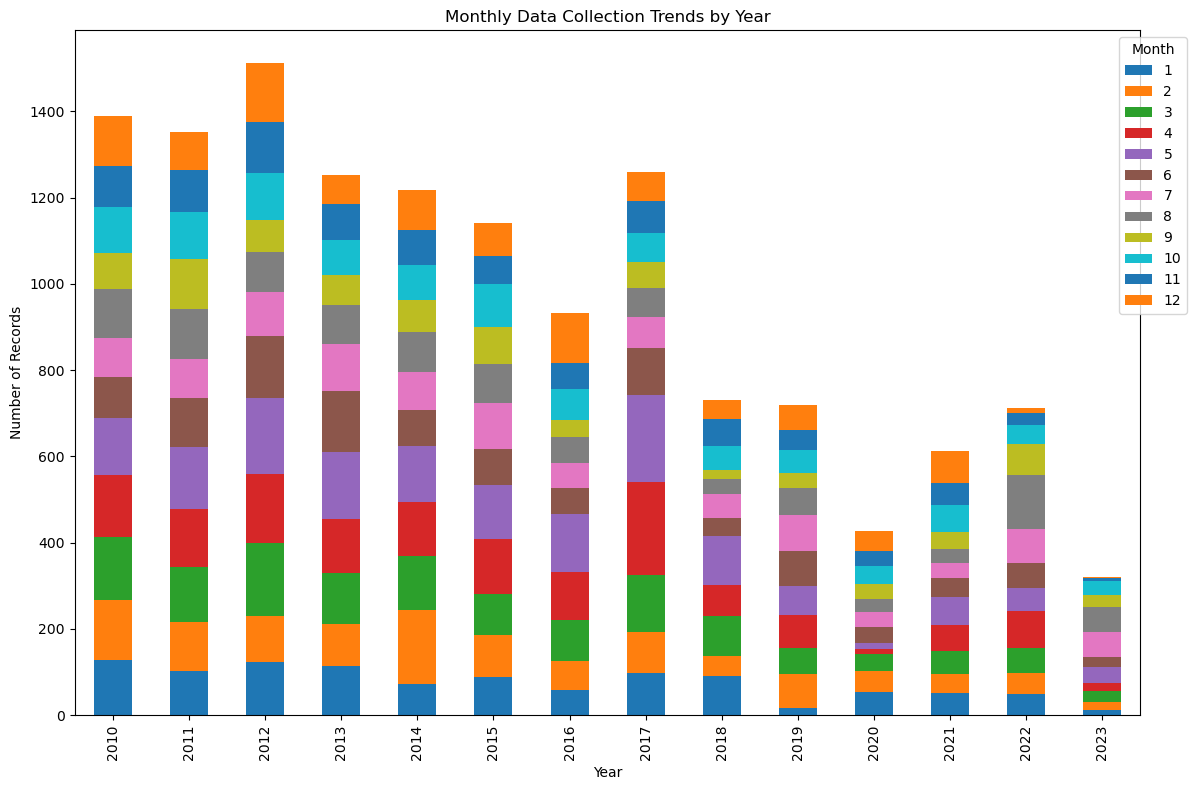

In [46]:
monthly_counts = pivot_data.groupby(['Year', 'Month']).size().unstack()
monthly_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Monthly Data Collection Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Forecasting and Prediction Modeling 

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Inspect unique values in 'CharacteristicName' after cleaning
pivot_data.head()

CharacteristicName,MonitoringLocationIdentifier,ActivityStartDate,Month,Year,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH
0,11NPSWRD_WQX-PORE_319_EU-L,2012-01-23,1,2012,NaN,NaN,10.730,17.8106,0.20,95.40,10.8,40.6,7.00
1,11NPSWRD_WQX-PORE_319_EU-L,2012-03-13,3,2012,NaN,NaN,9.265,0.2295,0.22,108.25,10.1,NaN,6.63
2,11NPSWRD_WQX-PORE_319_EU-L,2012-03-27,3,2012,NaN,NaN,10.740,1.7280,NaN,107.20,9.8,15.7,7.03
3,11NPSWRD_WQX-PORE_319_EU-L,2012-04-12,4,2012,NaN,NaN,10.700,1.7172,NaN,106.50,10.5,12.3,7.18
4,11NPSWRD_WQX-PORE_319_EU-L,2012-11-28,11,2012,NaN,NaN,8.370,NaN,0.55,NaN,12.8,12.4,6.99


## Impute Missing Values

### Mean Imputing certain Columns(do not have extreme outliers)

In [49]:
pivot_data['Flow'] = pivot_data['Flow'].fillna(pivot_data['Flow'].mean())
pivot_data['Specific conductance'] = pivot_data['Specific conductance'].fillna(pivot_data['Specific conductance'].mean())
pivot_data['Temperature, water'] = pivot_data['Temperature, water'].fillna(pivot_data['Temperature, water'].mean())


### Median Imputing certain Columns(have extreme outliers)

In [50]:
pivot_data['Ammonia'] = pivot_data['Ammonia'].fillna(pivot_data['Ammonia'].median())
pivot_data['Chlorophyll a'] = pivot_data['Chlorophyll a'].fillna(pivot_data['Chlorophyll a'].median())
pivot_data['Nitrate'] = pivot_data['Nitrate'].fillna(pivot_data['Nitrate'].median())
pivot_data['Turbidity'] = pivot_data['Turbidity'].fillna(pivot_data['Turbidity'].median())
pivot_data['pH'] = pivot_data['pH'].fillna(pivot_data['pH'].median())

### KNN Imputing DO since it's time dependent and prediction target variable so important

In [51]:
from sklearn.impute import KNNImputer

In [52]:
knn_imputer = KNNImputer(n_neighbors=5)
pivot_data['Dissolved oxygen (DO)'] = knn_imputer.fit_transform(pivot_data[['Year', 'Month', 'Temperature, water', 'Turbidity', 'pH', 'Specific conductance', 'Nitrate', 'Flow']])


In [53]:
pivot_data = pivot_data.drop(columns=[col for col in pivot_data.columns if 'lag' in col])
pivot_data.head()

CharacteristicName,MonitoringLocationIdentifier,ActivityStartDate,Month,Year,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH
0,11NPSWRD_WQX-PORE_319_EU-L,2012-01-23,1,2012,0.1,3.2,2012.0,17.81060,0.20000,95.400000,10.8,40.60,7.00
1,11NPSWRD_WQX-PORE_319_EU-L,2012-03-13,3,2012,0.1,3.2,2012.0,0.22950,0.22000,108.250000,10.1,3.38,6.63
2,11NPSWRD_WQX-PORE_319_EU-L,2012-03-27,3,2012,0.1,3.2,2012.0,1.72800,0.64425,107.200000,9.8,15.70,7.03
3,11NPSWRD_WQX-PORE_319_EU-L,2012-04-12,4,2012,0.1,3.2,2012.0,1.71720,0.64425,106.500000,10.5,12.30,7.18
4,11NPSWRD_WQX-PORE_319_EU-L,2012-11-28,11,2012,0.1,3.2,2012.0,5.11539,0.55000,93.778057,12.8,12.40,6.99


In [54]:
print(pivot_data.isnull().sum())

CharacteristicName
MonitoringLocationIdentifier    0
ActivityStartDate               0
Month                           0
Year                            0
Ammonia                         0
Chlorophyll a                   0
Dissolved oxygen (DO)           0
Flow                            0
Nitrate                         0
Specific conductance            0
Temperature, water              0
Turbidity                       0
pH                              0
dtype: int64


### Doing the Models

In [55]:
features = ['Temperature, water', 'Turbidity', 'pH', 'Specific conductance', 'Year', 'Month', 'Nitrate', 'Flow']
target = 'Dissolved oxygen (DO)'

In [56]:
# Create lag features (previous month's data)
pivot_data['DO_lag1'] = pivot_data.groupby('MonitoringLocationIdentifier')[target].shift(1)
pivot_data['Temp_lag1'] = pivot_data.groupby('MonitoringLocationIdentifier')['Temperature, water'].shift(1)
pivot_data['Turb_lag1'] = pivot_data.groupby('MonitoringLocationIdentifier')['Turbidity'].shift(1)
pivot_data['pH_lag1'] = pivot_data.groupby('MonitoringLocationIdentifier')['pH'].shift(1)


In [57]:
pivot_data = pivot_data.dropna(subset=['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1'])


In [60]:
pivot_data.head()

CharacteristicName,MonitoringLocationIdentifier,ActivityStartDate,Month,Year,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH,DO_lag1,Temp_lag1,Turb_lag1,pH_lag1
1,11NPSWRD_WQX-PORE_319_EU-L,2012-03-13,3,2012,0.1,3.2,2012.0,0.22950,0.22000,108.250000,10.1,3.38,6.63,2012.0,10.8,40.60,7.00
2,11NPSWRD_WQX-PORE_319_EU-L,2012-03-27,3,2012,0.1,3.2,2012.0,1.72800,0.64425,107.200000,9.8,15.70,7.03,2012.0,10.1,3.38,6.63
3,11NPSWRD_WQX-PORE_319_EU-L,2012-04-12,4,2012,0.1,3.2,2012.0,1.71720,0.64425,106.500000,10.5,12.30,7.18,2012.0,9.8,15.70,7.03
4,11NPSWRD_WQX-PORE_319_EU-L,2012-11-28,11,2012,0.1,3.2,2012.0,5.11539,0.55000,93.778057,12.8,12.40,6.99,2012.0,10.5,12.30,7.18
5,11NPSWRD_WQX-PORE_319_EU-L,2012-12-21,12,2012,0.1,3.2,2012.0,2.17620,0.64425,103.800000,10.4,19.00,6.96,2012.0,12.8,12.40,6.99


In [61]:
X = pivot_data[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']]
y = pivot_data[target]
# Train-test split (e.g., 80% for training, 20% for testing)
train_size = int(len(pivot_data) * 0.8)
train_data, test_data = pivot_data[:train_size], pivot_data[train_size:]

In [62]:
X_train, X_test = train_data[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']], test_data[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']]
y_train, y_test = train_data[target], test_data[target]

## Linear Regression

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

In [64]:
# Model 2: Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)


In [65]:
# Model 3: XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)

In [66]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [67]:
print("Linear Regression Evaluation:")
print(evaluate_model(y_test, y_pred_lin_reg))

print("Random Forest Evaluation:")
print(evaluate_model(y_test, y_pred_rf))

print("XGBoost Evaluation:")
print(evaluate_model(y_test, y_pred_xgb))

Linear Regression Evaluation:
(0.0, 0.0, 1.0)
Random Forest Evaluation:
(0.00017269736842089557, 1.7269736842073848e-06, 0.9999998968541818)
XGBoost Evaluation:
(0.00013647581401624178, 2.017661340926823e-08, 0.9999999987949247)


### Visualize Models

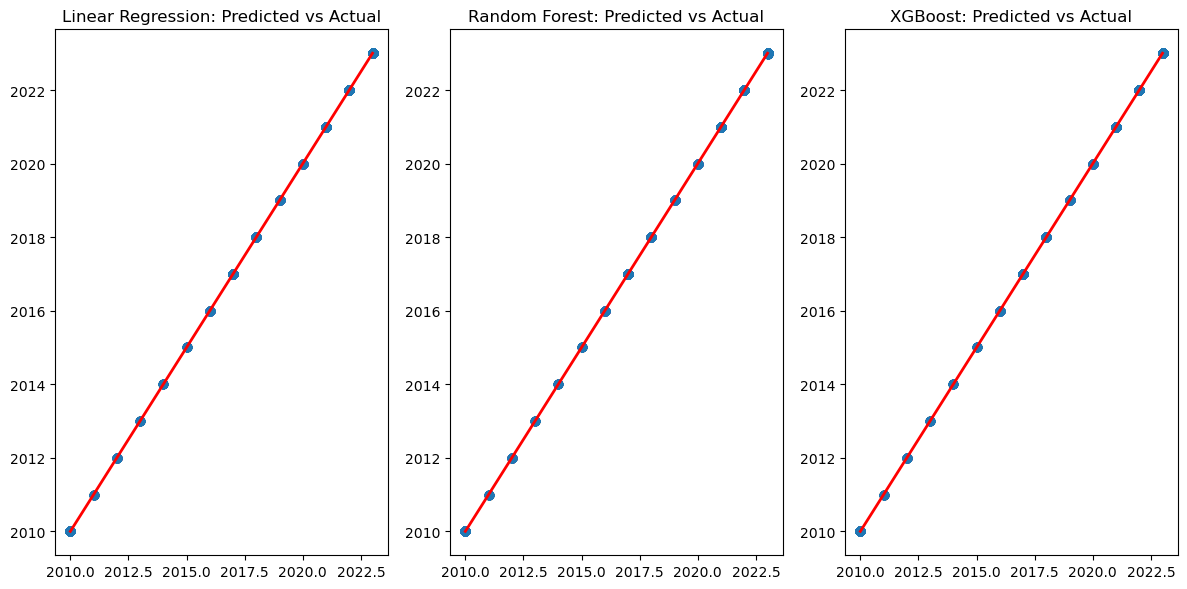

In [71]:
linear_pred = lin_reg.predict(X_test)
rf_pred = rf_regressor.predict(X_test)
xgb_pred = xgb_regressor.predict(X_test)

plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression: Predicted vs Actual')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Random Forest: Predicted vs Actual')

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, xgb_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('XGBoost: Predicted vs Actual')

plt.tight_layout()
plt.show()